Shape of HDF5 Dataset: (4, 10, 300, 10000, 2)


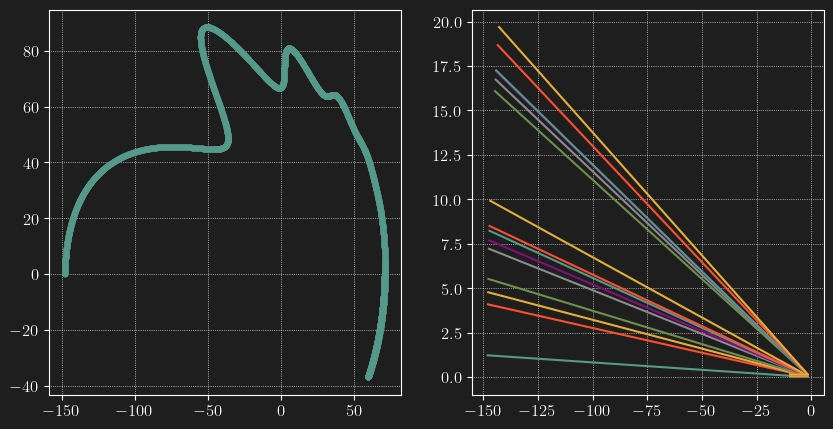

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from tqdm import tqdm
plt.style.use("dark")

f = h5py.File('/home/max/Documents/scattering_data.hdf5', 'r')
dset = f['test']
print("Shape of HDF5 Dataset:", dset.shape)

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(dset[0,-1,-1,:,0], dset[0,-1,-1,:,1], ".")
for i in np.unique(np.random.randint(0,dset.shape[2], 15)):
    sample = dset[0,-1,:,i,:]
    ax[1].plot(sample[:,0], sample[:,1], "-")

In [2]:
def get_angles(cpuid):
    angles = []
    for i in range(dset.shape[1]):
        print(i)
        sample = dset[cpuid,i,:,:,:]

        
    
    #u = sample[0,:,:] - sample[1,:,:]
        v = sample[-1,:,:] - sample[-2,:,:]
        u = np.zeros(v.shape)
        u[:,0] = 1.0

        u_norm = np.linalg.norm(u, axis=1)
        v_norm = np.linalg.norm(v, axis=1)

        denom = u_norm*v_norm
        dotP = (u*v).sum(axis=1)
        cosine = dotP/denom
        angle_rad = np.arccos(cosine)
        angle_deg = np.rad2deg(angle_rad)
        angles.append(angle_deg)

    # mask =np.any([np.all([(sample[0,:,1] > 0), (v[:,1] < 0)], axis=0), 
    #               np.all([(sample[0,:,1] < 0), (v[:,1] > 0)], axis=0)],axis=0)
    # angle_deg[mask] = 360 - angle_deg[mask]

    # angle_deg = angle_deg[np.where(angle_deg != 0.0)]
    # angles = angle_deg[np.where(angle_deg != 180)]

    return angles#[angle_deg!=0.0]

In [3]:
with Pool(processes=4) as p:
  all_angles = p.map(get_angles, [0,1,2,3])


0000



1
1
11

2
2
2
2
3
3
3
3
44
4

54
55


66

56

7
7
7
8
6
8
8
9
97
9

8
9


(40, 10000)


/tmp/ipykernel_79830/1838135345.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


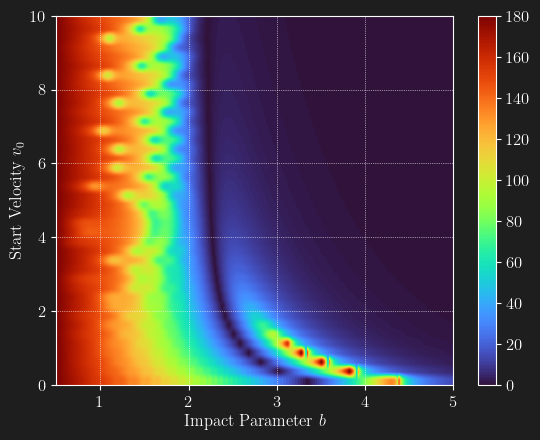

In [16]:
print(np.vstack(all_angles).shape)

plt.imshow(np.vstack(all_angles), extent=[0.5,5,0,10], cmap="turbo", origin="lower", aspect="auto")
plt.xlabel("Impact Parameter $b$")
plt.ylabel("Start Velocity $v_0$")
plt.colorbar()

Text(0, 0.5, 'Counts')

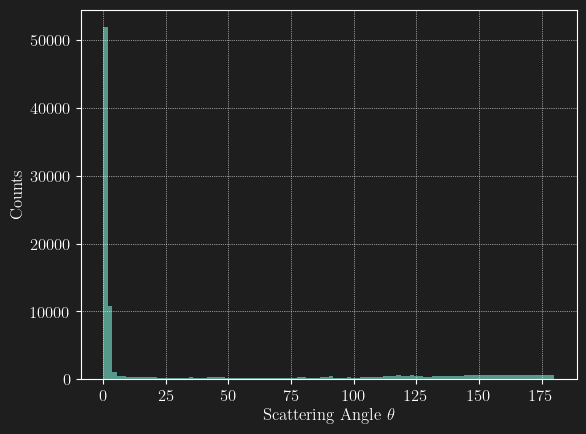

In [17]:

angles = np.hstack(all_angles[-1])
bins = plt.hist(angles, bins=100)
plt.xlabel("Scattering Angle $\\theta$")
plt.ylabel("Counts")

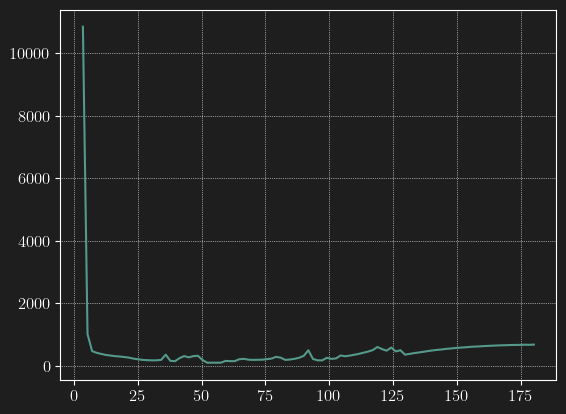

In [18]:
plt.plot(bins[1][2:], bins[0][1:])

Text(0, 0.5, 'Scattering Angle $\\theta$')

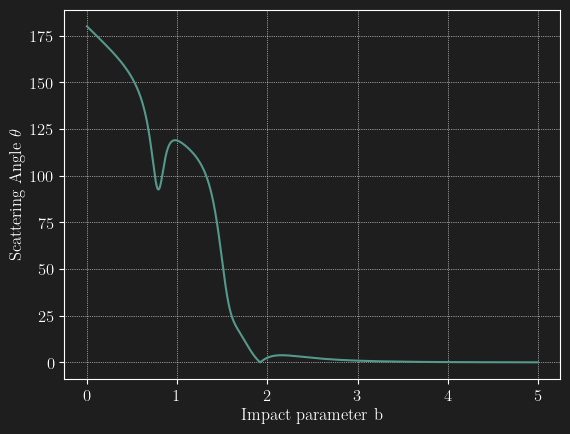

In [19]:
b = np.linspace(0,5,1*100**2)
theta = angles[:100**2]


plt.plot(np.linspace(0,5,1*100**2), angles[:100**2])
plt.xlabel("Impact parameter b")
plt.ylabel("Scattering Angle $\\theta$")

82.12678109696986


Text(0, 0.5, 'Differential Cross Section $\\frac{\\mathrm{d}\\sigma}{\\mathrm{d}\\Omega}$')

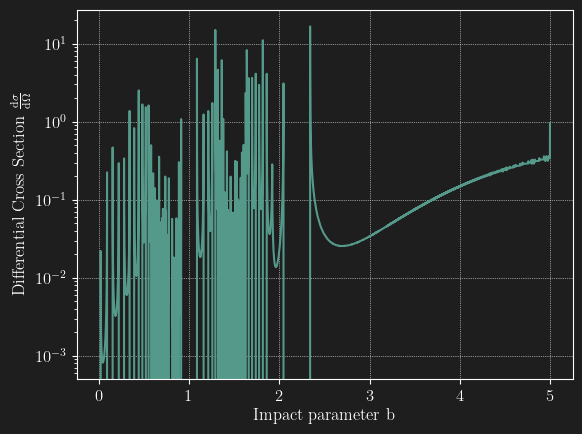

In [33]:
b = np.linspace(0,5,10000)
theta = angles[:10000]
db = np.roll(b, -1) - np.roll(b, 1)
dtheta = np.roll(theta, -1) - np.roll(theta, 1)
dbdtheta = np.abs(db/(dtheta+1e-1))
diff_cross_section = b/(np.sin(theta)+1e-1)*dbdtheta

sigma_tot = np.sum(np.ma.masked_invalid(diff_cross_section))
print(sigma_tot)

plt.plot(b, diff_cross_section)
plt.yscale("log")
plt.xlabel("Impact parameter b")
plt.ylabel("Differential Cross Section $\\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}$")

In [35]:
all_angles_combined = np.vstack(all_angles)
sigma_tot_array = []
for i in range(dset.shape[1]):
    angles = all_angles_combined[i]
    b = np.linspace(0,5,10000)
    theta = angles[:10000]
    db = np.roll(b, -1) - np.roll(b, 1)
    dtheta = np.roll(theta, -1) - np.roll(theta, 1)
    dbdtheta = np.abs(db/(dtheta+1e-1))
    diff_cross_section = b/(np.sin(theta)+1e-1)*dbdtheta

    sigma_tot = np.sum(np.ma.masked_invalid(diff_cross_section))
    sigma_tot_array.append(sigma_tot)

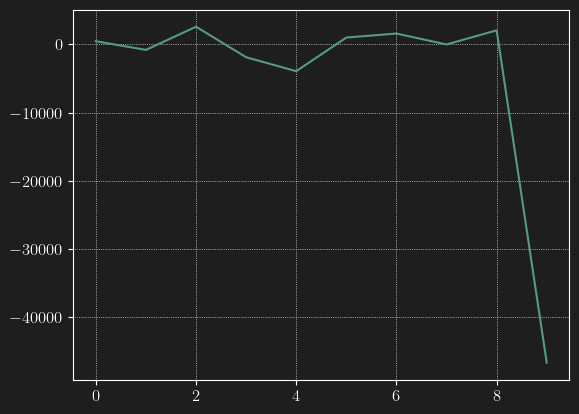

In [36]:
plt.plot(sigma_tot_array)